# Import packages

In [1]:
import pandas as pd

# Custom functions

In [2]:
from histogram_data_cleaning import filter_df_by_IQR, plot_original_vs_filtered

# Read in example data

In [3]:
original_df = pd.read_csv('example_input_data\\example_histogram_data.csv')
#This
# is a skew to the right data
original_df

,bin_start,count
0,1.228,7
1,1.275,2
2,1.323,6
3,1.371,6
4,1.418,18
...,...,...
251,13.168,0
252,13.215,0
253,13.263,0
254,13.310,0


# Generate skew to left data
`original_df` skew to right and this step artificially generates a skew to
left data by vertically flipping the `bin_start` column without changing the
`count` column for later testing

In [4]:
# Artificially make a histogram that skews to the left by flipping the original histogram horizontally

artificial_df = original_df.copy()

artificial_df['bin_start'] = artificial_df['bin_start'].iloc[::-1].reset_index(drop=True) #Flip the "bin_start" column to have the whole histogram flipped horizontally

artificial_df

,bin_start,count
0,13.358,7
1,13.310,2
2,13.263,6
3,13.215,6
4,13.168,18
...,...,...
251,1.418,0
252,1.371,0
253,1.323,0
254,1.275,0


# Tests

## Common IQR method
Common IQR method to get rid of outliers is to use 25th and 75th quantile to
 define the IQR and data points outside ± 1.5IQR are considered as
 outliers which will be filtered out

### Skew-to-right data

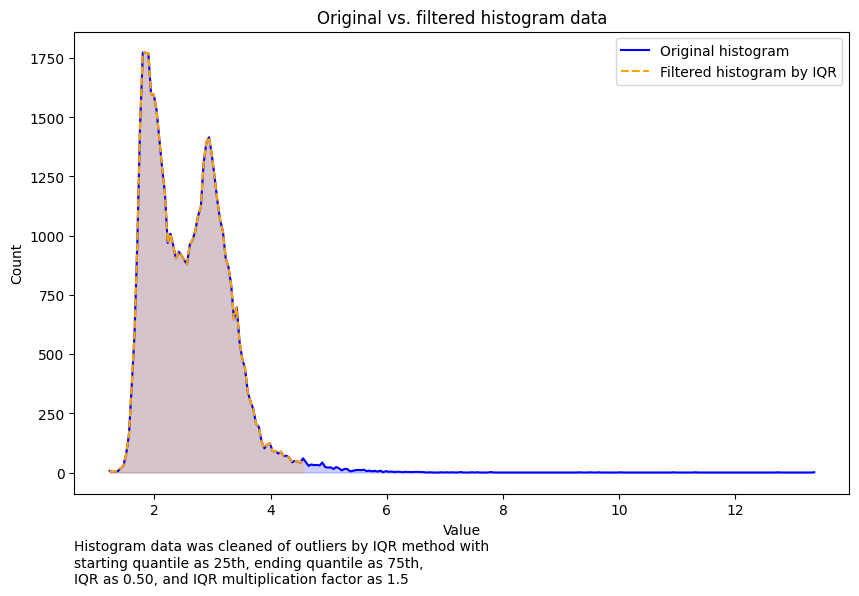

In [5]:
filtered_original_df = plot_original_vs_filtered(original_df)
#plot_original_vs_filtered will output the filtered data

In [6]:
filtered_original_df

,bin_start,count
0,1.228,7
1,1.275,2
2,1.323,6
3,1.371,6
4,1.418,18
...,...,...
66,4.367,43
67,4.415,49
68,4.462,47
69,4.510,42


### Skew-to-left data

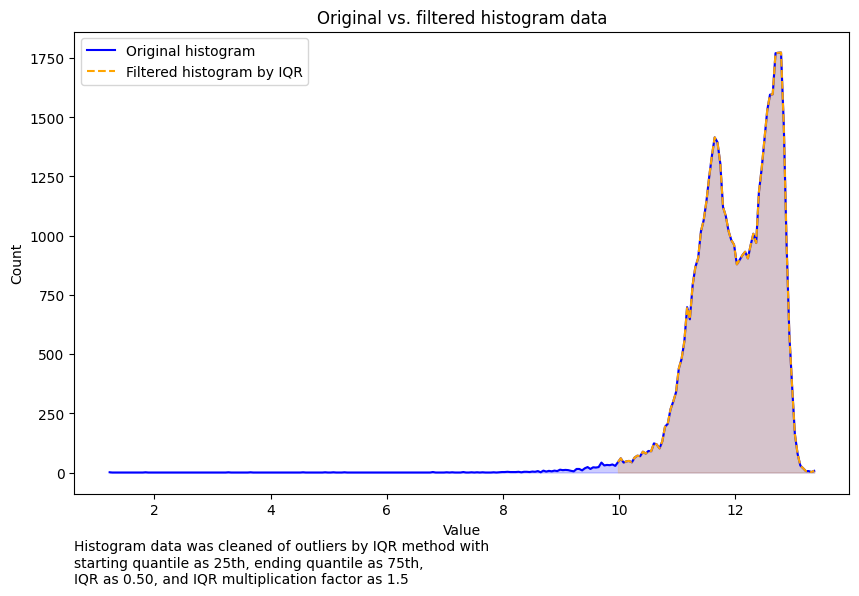

In [7]:
filtered_artificial_df = plot_original_vs_filtered(artificial_df)

In [8]:
filtered_artificial_df

,bin_start,count
0,9.980,44
1,10.028,60
2,10.076,42
3,10.123,47
4,10.171,49
...,...,...
67,13.168,18
68,13.215,6
69,13.263,6
70,13.310,2


## Filter by other quantile rules
I define the worker function that performs the filtering with freedom for
user to provide any quantiles they want to use as `starting_quantile`,
`ending_quantile`, and `iqr_multiplication_factor`

### Skew-to-right data

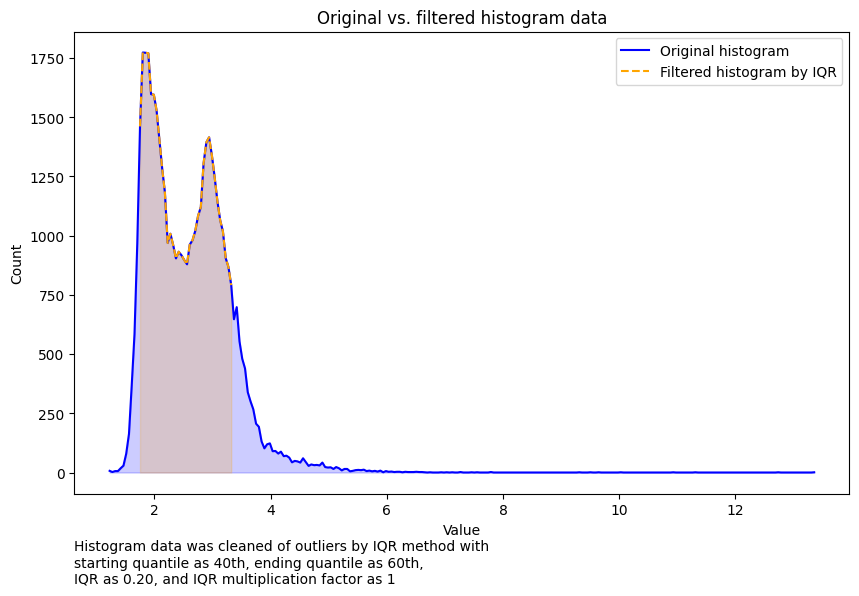

In [9]:
filtered_original_df = plot_original_vs_filtered(
    original_df,
    starting_quantile = 0.4,
    ending_quantile = 0.6,
    iqr_multiplication_factor = 1
    )

In [10]:
filtered_original_df

,bin_start,count
0,1.751,1461
1,1.799,1773
2,1.846,1772
3,1.894,1770
4,1.941,1597
5,1.989,1595
6,2.036,1528
7,2.084,1408
8,2.132,1284
9,2.179,1183


### Skew-to-left data

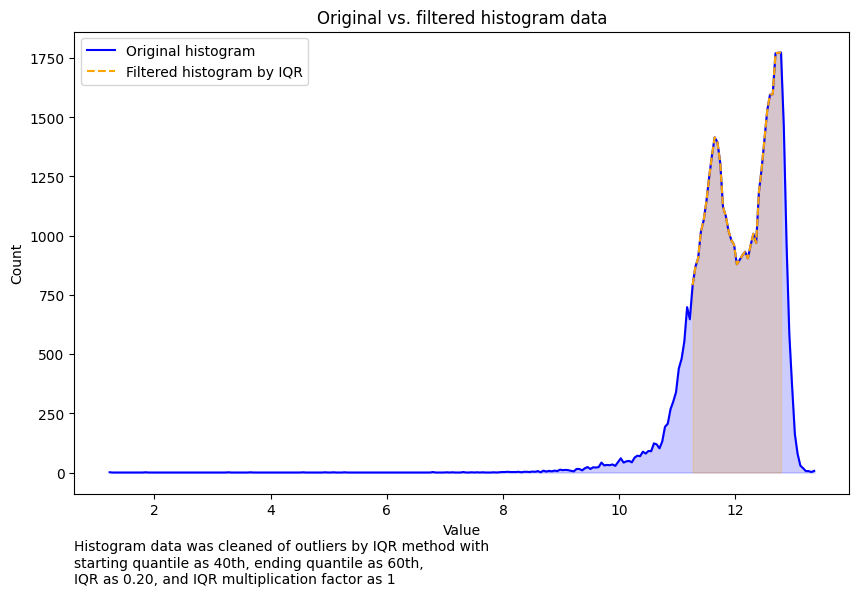

In [11]:
filtered_artificial_df = plot_original_vs_filtered(
    artificial_df,
    starting_quantile = 0.4,
    ending_quantile = 0.6,
    iqr_multiplication_factor = 1
    )

In [12]:
filtered_artificial_df

,bin_start,count
0,11.265,791
1,11.312,868
2,11.360,905
3,11.408,1018
4,11.455,1065
5,11.503,1146
6,11.550,1248
7,11.598,1339
8,11.645,1415
9,11.693,1394
